In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv


In [2]:
pokemon_df = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv')
pokemon_df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [3]:
pokemon_df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [4]:
pokemon_df.rename(columns={'Type 1':'type1','Type 2':'type2'}, inplace = True)
pokemon_df.type1.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

NameError: name 'plt' is not defined

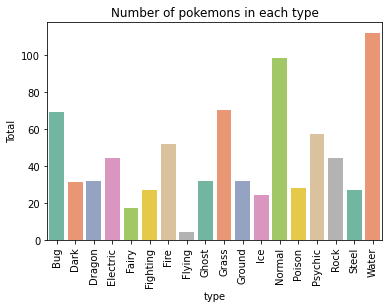

In [5]:
import seaborn as sns
plot1 = pokemon_df[['type1','Total']].groupby('type1')['Total'].count().to_frame()
plot1['type']=plot1.index
plot1.reset_index(drop=True)
ax = sns.barplot(x='type',y='Total',data=plot1,palette = 'Set2')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Number of pokemons in each type')
plt.show()

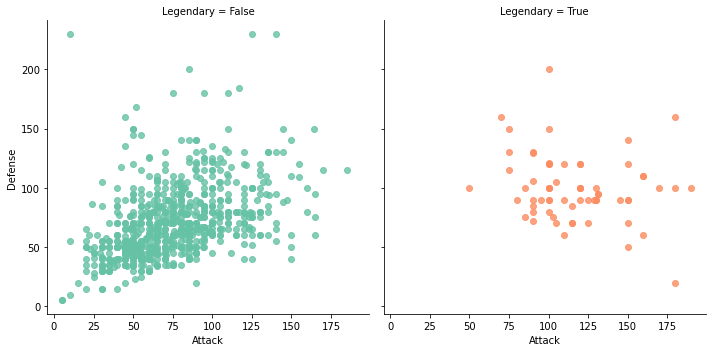

In [6]:
plot2 = pokemon_df.loc[:,('Name','Attack','Defense','Legendary')]
plot2['Number']=plot2.reset_index().index
plot2=plot2[['Number','Name','Attack','Defense','Legendary']]
import seaborn as sns
import matplotlib.pyplot as plt
b = sns.lmplot(x="Attack", y="Defense", data=plot2, hue ='Legendary', col='Legendary', fit_reg = False,palette = 'Set2')

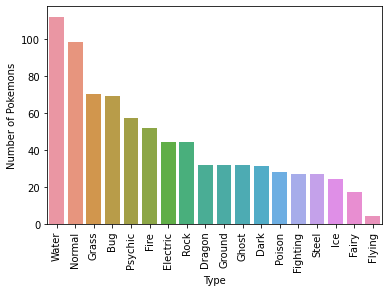

In [7]:
trial1 = pokemon_df['type1'].value_counts().to_frame()
trial1['Type']=trial1.index
trial1.rename(columns={'type1':'Number of Pokemons'}, inplace = True)
trial1.reset_index(drop=True)
bx = sns.barplot(x=trial1["Type"], y = trial1["Number of Pokemons"])
bx.set_xticklabels(bx.get_xticklabels(),rotation=90)
plt.show()

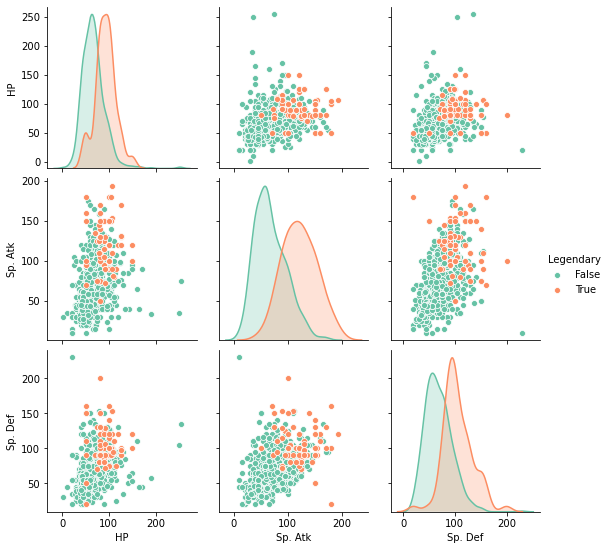

In [8]:
trial2 = pokemon_df.loc[:,('type2','HP','Sp. Atk','Sp. Def','Legendary')]
g = sns.pairplot(trial2, hue ='Legendary', palette = 'Set2')